# P. Visión

In [1]:
import numpy as np
import cv2
import os
import random
from skimage.feature import hog
from skimage import exposure
from matplotlib import pyplot as plt

In [2]:
def leerFotos(path):
    os.chdir(path)
    listaPos = os.listdir()
    fotosDic = {}
    for i in range(len(listaPos)):
        fotosDic[i] = cv2.imread(listaPos[i],0)
    return fotosDic

In [3]:
path = 'C:\\Users\\alumno\\Desktop\\Human_Detection_Project-master\\train_pos'
fotosPosTrain = leerFotos(path)

maskHeight,maskWidth = fotosPosTrain[0].shape

path = 'C:\\Users\\alumno\\Desktop\\Human_Detection_Project-master\\train_neg'
fotosNegTrainSinTratar = leerFotos(path)

In [4]:
def generaImagenesRecortadas(dataPos,dataNeg):    
    numeroAleatoriasPorFoto = 3       # Numero de recortadas aleatorias por foto
    rowsFotoPersona = dataPos[0].shape[0]
    colsFotoPersona = dataPos[0].shape[1]

    rowsFotoEntorno = dataNeg[0].shape[0]
    colsFotoEntorno = dataNeg[0].shape[1]

    fotosNegTrain = {}
    for i in range(len(dataNeg)):      
        for j in range(numeroAleatoriasPorFoto):
            randRow = random.randint(0,rowsFotoEntorno - rowsFotoPersona)
            randCol = random.randint(0,colsFotoEntorno - colsFotoPersona)
            randomImage = dataNeg[i][randRow:randRow + rowsFotoPersona,randCol: randCol + colsFotoPersona]
            fotosNegTrain[(i,j)] = randomImage 
    return fotosNegTrain

In [5]:
fotosNegTrain = generaImagenesRecortadas(fotosPosTrain,fotosNegTrainSinTratar)

In [6]:
def parteImagen(imagen,maskHeight,maskWidth,desp):
    arrayImagen = {}
    aux = 0
    for i in range(0,imagen.shape[0],desp):        
        for j in range(0,imagen.shape[1],desp):
            if (i+maskHeight < imagen.shape[0] and j+maskWidth < imagen.shape[1]):
                arrayImagen[aux] = imagen[i:i+maskHeight,j:j+maskWidth]
                aux = aux + 1
    return arrayImagen

In [7]:
def ampliacion_v2(imagen):    
    r1 = np.min(imagen)
    r2 = np.max(imagen)         
    imagen = np.float32(imagen)
    imagen = 255*(imagen-r1)/(r2-r1)
    imagen = np.uint8(imagen)   
    return imagen

In [ ]:
def im_to_col(imagen, m, n):
    filas, columnas = imagen.shape
    a = int(m/2)
    b = int(n/2)
    imagen2 = np.zeros((m*n, filas*columnas))
    imagen = cv2.copyMakeBorder(imagen, a, a, b, b, cv2.BORDER_REPLICATE)
    aux = 0
    for i in range(a, filas+a):
        for j in range(b, columnas+b):
            imagen2[:, aux] = imagen[i-a:i+a+1, j-b:j+b+1].flatten()
            aux += 1
    return imagen2

In [ ]:
def filtro_espacial_v2(imagen, f):    
    imagen2 = im_to_col(imagen,f.shape[0],f.shape[1])    
    f2 = f.reshape(f.size,1)
    imagen2 = np.float32(imagen2)
    imagen2 = np.multiply(imagen2,f2)
    imagen2 = np.sum(imagen2,axis=0)
    imagen2 = np.uint8(imagen2)    
    imagen2 = imagen2.reshape(imagen.shape)    
    return imagen2

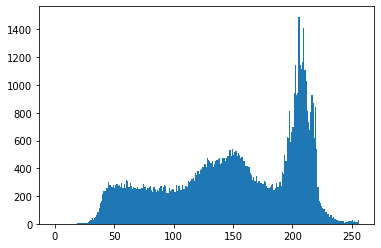

In [8]:
# Hog test
imageTest = fotosNegTrainSinTratar[10]
hist,bins = np.histogram(imageTest.ravel(),256,[0,256])


plt.hist(imageTest.ravel(),256,[0,256])
plt.show()
ecualizada = ampliacion_v2(imageTest)

suavizada = filtro_espacial_v2():

cv2.imshow('Test',imageTest)
cv2.imshow('Ecualizada',ecualizada)
cv2.imshow('Hog',hog(imageTest,visualize=True)[1])
cv2.imshow('Hog de ecualizada',hog(ecualizada,visualize=True)[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def vectolizarHOG(imagenes,esPositivo):
    ### Esata funcion aplica HOG a todas las imagenes del diccionario
    
    #tamaño del vector
    tamVector = len(hog(imagenes[0]))
    
    #inicializamos la matriz que guarda los imagenes vectolizados
    fdImagenes = np.zeros((len(imagenes),tamVector))
    
    for i in range(len(imagenes)):
        fdImagenes[i] = hog(imagenes[i])
    
    #asignamos el vector de clases(y) 
    if esPositivo:
        y = np.ones((len(imagenes),1))
    else:
        y = np.zeros((len(imagenes),1))

    return fdImagenes,y



In [ ]:
fotosNegTrain = generaImagenesRecortadas(fotosPosTrain,fotosNegTrainSinTratar)

In [ ]:
fdPosTrain,yPos = vectolizarHOG(fotosPosTrain,1)

fdNegTrain,yNeg = vectolizarHOG(fotosNegTrain,0)

In [ ]:
fotosTrain = np.vstack((fdPosTrain,fdNegTrain))
y = np.vstack((yPos,yNeg))

In [ ]:
clf = svm.SVC()
clf.fit(fotosTrain,y)

In [ ]:
clf.score(fdPosTrain,yPos)